In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape, x_test.shape)

## 데이터를 (배치사이즈 x 28 x 28 x 1)로 이미지를 변환해줌. -> 그레이스케일이므로 채널은 1
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


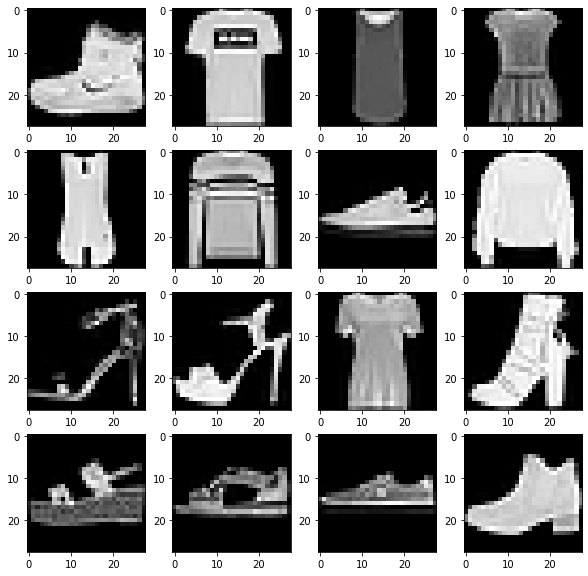

In [ ]:
plt.figure (figsize = (10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i][:,:,0],cmap = 'gray')
plt.show()



In [ ]:
## 정답을 바이너리화 함.
y_train = tf.keras.utils.to_categorical(y_train)
y_test_s = tf.keras.utils.to_categorical(y_test)

print(y_train.shape, y_test.shape)
y_train[0]

(60000, 10) (10000,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Activation Map 크기 구하기

input Image size = 7*7   filter = 3 * 3 stride =?
(N(inputsize) - F(filter_size) )/ stride + 1

padding = 'valid'  작아짐


In [ ]:
# CNN 모델 설계.
## 모델
input_Layer = tf.keras.Input(shape = (28,28,1))
x = tf.keras.layers.Conv2D(32,(3,3), strides  =1 , activation = None,padding= 'same')(input_Layer)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(64,(3,3), strides  =1 , activation = None)(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512,activation = 'relu')(x)
out_layer= tf.keras.layers.Dense(10,activation = 'softmax')(x)

model = tf.keras.Model(inputs = [input_Layer], outputs = [out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               118016

In [ ]:
 # 모델 컴파일
loss= tf.keras.losses.categorical_crossentropy
optimizer =tf.keras.optimizers.Adam()
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss=loss,
             optimizer=optimizer,
             metrics=metric)

In [ ]:
# 모델 최적화 설정
import os
MODEL_DIR = '/content/drive/MyDrive/YGL/10.28/cnn_model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./CNN_Fasion_MNIST_model/{epoch:02d}-{val_loss:.4f}.hdf5"
callback_list=[tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]

In [ ]:
# 모델의 실행
history = history = model.fit(x_train,y_train,epochs=5,batch_size = 200,validation_split = 0.1,verbose =1, callbacks = callback_list)

Epoch 1/5
270/270 [==============================] - 3s 12ms/step - loss: 0.1563 - categorical_accuracy: 0.9430 - val_loss: 0.3078 - val_categorical_accuracy: 0.8988

Epoch 00001: val_loss did not improve from 0.29444
Epoch 2/5
270/270 [==============================] - 3s 11ms/step - loss: 0.1333 - categorical_accuracy: 0.9512 - val_loss: 0.3012 - val_categorical_accuracy: 0.9008

Epoch 00002: val_loss did not improve from 0.29444
Epoch 3/5
270/270 [==============================] - 3s 11ms/step - loss: 0.1098 - categorical_accuracy: 0.9606 - val_loss: 0.3180 - val_categorical_accuracy: 0.9013

Epoch 00003: val_loss did not improve from 0.29444
Epoch 4/5
270/270 [==============================] - 3s 11ms/step - loss: 0.0930 - categorical_accuracy: 0.9660 - val_loss: 0.3207 - val_categorical_accuracy: 0.9040

Epoch 00004: val_loss did not improve from 0.29444
Epoch 5/5
270/270 [==============================] - 3s 11ms/step - loss: 0.0931 - categorical_accuracy: 0.9663 - val_loss: 0.34

In [ ]:
!nvidia-smi

Thu Oct 28 06:25:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    62W / 149W |    545MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# 테스트 정확도 출력
test_loss, test_accuracy = model.evaluate(x_test, y_test_s)
print("\n Test Accuracy: %.4f" %test_accuracy)
print("\n Test Loss    : %.4f"%test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.3714 - categorical_accuracy: 0.8950

 Test Accuracy: 0.8950

 Test Loss    : 0.3714


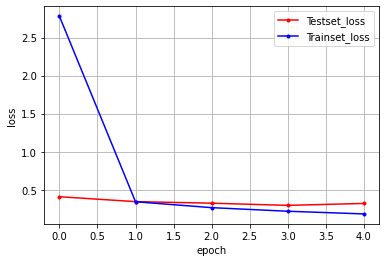

In [ ]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[:,:,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

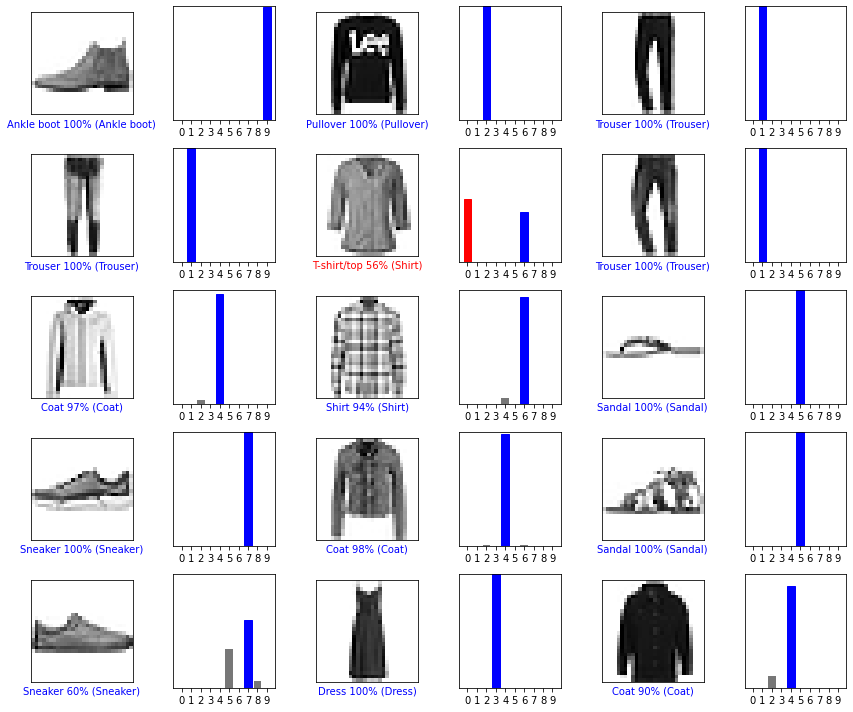

In [ ]:
predictions  = model.predict(x_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()